In [1]:
from xmitgcm import open_mdsdataset
import xgcm
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
currentDirectory = os.getcwd()
data_dir = currentDirectory[:-7] + '/input/'
print(data_dir)

/project/6001902/jxchang/HighRes1/results/TideU008N0LinH200ho140Ah0200/input/


In [3]:
ds1 = open_mdsdataset(data_dir, geometry='cartesian',endian='<',prefix=['statevars'])
print(ds1.chunks)
ds1 = ds1.chunk(chunks={"XG":360,"XC":360})
print(ds1.chunks)

Frozen(SortedKeysDict({'YC': (120,), 'XC': (1440,), 'YG': (120,), 'XG': (1440,), 'Zp1': (41,), 'Z': (40,), 'time': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), 'Zl': (40,)}))
Frozen(SortedKeysDict({'YC': (120,), 'XC': (360, 360, 360, 360), 'YG': (120,), 'XG': (360, 360, 360, 360), 'Zp1': (41,), 'Z': (40,), 'time': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [4]:
ds2 = open_mdsdataset(data_dir, geometry='cartesian', endian='<',prefix=['energymvars'])
ds2 = ds2.chunk(chunks={"XG":360,"XC":360})

grid = xgcm.Grid(ds1, periodic=False)
print(grid)

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
X Axis (not periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center


In [5]:
xmin = 13000
xmax = 67000
ymin = 0
ymax = 3000
numcolt=21
numcolv=21

In [6]:
time1=ds1.coords['time'].values/np.timedelta64(1, 's')
time=ds2.coords['time'].values/np.timedelta64(1, 's')
xc=ds1.coords['XC']
xg=ds1.coords['XG']
yc=ds1.coords['YC']
yg=ds1.coords['YG']
z=ds1.coords['Z']
ix=[i for i, e in enumerate(xc) if (e > xmin) & (e < xmax)]
iy=[i for i, e in enumerate(yc) if (e > ymin) & (e < ymax)]
print(ix[0],ix[-1])
print(iy[0],iy[-1])

25 1414
0 119


In [7]:
viscAh=2.e-2
rhoNil=999.8

alpha = 2e-4
beta = 0.
tR_fname="../indata/TRef.bin"
tRef = np.fromfile(tR_fname)
refSalt=35.
ds1['tRef']=xr.DataArray(tRef,coords=[z],dims=['Z'])

In [8]:
ttlen=len(ds1.time)
print('the length of time:' + str(ttlen) )
print('initial temp: '+ str(tRef))

the length of time:173
initial temp: [63.59230582 40.69584406 33.47293155 31.54712706 29.26896757 28.65696899
 28.23721628 27.65390158 27.08300659 26.5118492  25.90295299 25.69407634
 25.29910279 24.81832859 24.41499174 24.26210069 24.21619203 24.14261024
 24.0996551  24.02495734 23.98958682 23.95165181 23.93411373 23.9224752
 23.91844136 23.91059116 23.87093593 23.86487752 23.86221099 23.85790713
 23.84947122 23.84359894 23.82719386 23.81078878 23.79438371 23.77797863
 23.76157355 23.74516847 23.72876339 23.71235831]


In [9]:
rho=(rhoNil*(1-alpha*(ds1['THETA']-ds1['tRef'])+beta*(ds1['SALT']-refSalt)))*ds1['maskC']
print('rho:'+str(rho))
rhol=grid.interp(rho,'Z',boundary='extrapolate')
dt=time[1]-time[0]
print('dt:' +str(dt))

rho:<xarray.DataArray (time: 173, Z: 40, YC: 120, XC: 1440)>
dask.array<mul, shape=(173, 40, 120, 1440), dtype=float64, chunksize=(1, 40, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float64 356.8 1.06e+03 1.745e+03 ... 7.894e+04 7.964e+04
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
  * Z        (Z) float64 -2.5 -7.5 -12.5 -17.5 ... -182.5 -187.5 -192.5 -197.5
    rA       (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    Depth    (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    drF      (Z) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    PHrefC   (Z) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float64 dask.array<chunksize=(40, 120, 360), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(40, 120, 360), meta=np.ndarray>
    rhoRef   (Z) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<

In [10]:
time_bin_labels = np.arange(12.4*60*60/2,time[-1]-20000,12.4*60*60)
print('time_bin_labels:' +str(time_bin_labels))
time_bin = pd.timedelta_range(0, periods=8,freq='44660S')
print('time_bin:' + str(time_bin))
time_ns = pd.timedelta_range(0, periods=ttlen,freq='1860S')

time_bin_labels:[ 22320.  66960. 111600. 156240. 200880. 245520. 290160.]
time_bin:TimedeltaIndex(['0 days 00:00:00', '0 days 12:24:20', '1 days 00:48:40',
                '1 days 13:13:00', '2 days 01:37:20', '2 days 14:01:40',
                '3 days 02:26:00', '3 days 14:50:20'],
               dtype='timedelta64[ns]', freq='44660S')


In [11]:
# depth mean velocity
U0W=((ds1['UVEL']*ds1['drF']*ds1['hFacW']).sum('Z'))/(ds1.drF*ds1.hFacW*ds1.maskW).sum('Z')
V0S=((ds1['VVEL']*ds1['drF']*ds1['hFacS']).sum('Z'))/(ds1.drF*ds1.hFacS*ds1.maskS).sum('Z')
ds1['U0W']=xr.DataArray(U0W.data,coords=[time_ns,yc,xg],dims=['time','YC','XG'])
ds1['V0S']=xr.DataArray(V0S.data,coords=[time_ns,yg,xc],dims=['time','YG','XC'])
del U0W,V0S

In [12]:
# baroclinic velocity
ds1['maskL']=grid.interp(ds1.hFacC,'Z',to='left', boundary='extrapolate')  #mask for wvel
ds1['upW']=(ds1['UVEL']-ds1['U0W'])*ds1['maskW']
ds1['vpS']=(ds1['VVEL']-ds1['V0S'])*ds1['maskS']
wp=ds1['WVEL'].where(ds1['maskL'] !=0, np.nan)

In [13]:
# horizontal dissipation
ds1['maskZ'] = grid.interp(ds1.hFacS, 'X', boundary='extrapolate') #for dvdx
ds1['hFacZ'] = grid.interp(ds1.hFacS, 'X', boundary='extrapolate') #for dvdx
ds1['hFacWL'] = grid.interp(ds1.hFacW, 'Z', to='left', boundary='extrapolate')  #for dwdx
print(ds1.hFacWL.dims)
ds1['hFacSL'] = grid.interp(ds1.hFacS, 'Z', to='left', boundary='extrapolate')  #for dwdy
print(ds1.hFacSL.dims)
ds1['drL']=grid.interp(ds1.drF, 'Z', to='left', boundary='extrapolate')

('Zl', 'YC', 'XG')
('Zl', 'YG', 'XC')


In [14]:
hDispbc1 = rhoNil*viscAh*(((grid.diff(ds1.upW* ds1.dyG , 'X', boundary='extrapolate')/ds1.rA)**2+(grid.diff(ds1.vpS* ds1.dxG , 'Y', boundary='extrapolate')/ds1.rA)**2)*(ds1['drF']*ds1['hFacC'])).sum('Z')  #dudx & dvdy
hDispbc2 = rhoNil*viscAh*(((grid.diff(ds1.vpS* ds1.dyC , 'X', boundary='extrapolate')/ds1.rAz)**2+(grid.diff(ds1.upW* ds1.dxC , 'Y', boundary='extrapolate')/ds1.rAz)**2)*(ds1['drF']*ds1['hFacZ'])).sum('Z') #dvdx & dudy
hDispbc31 = rhoNil*viscAh*(((grid.diff(wp ,'X',boundary='extrapolate')/ds1.dxC)**2)*(ds1['drL']*ds1['hFacWL'])).sum('Zl')  #dwdx
hDispbc32 = rhoNil*viscAh*(((grid.diff(wp ,'Y',boundary='extrapolate')/ds1.dyC)**2)*(ds1['drL']*ds1['hFacSL'])).sum('Zl')  #dwdy

In [15]:
ta_hDispbc1 = hDispbc1.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_hDispbc2 = hDispbc2.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_hDispbc31 = hDispbc31.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_hDispbc32 = hDispbc32.groupby_bins('time',time_bin,labels=time_bin_labels).mean()

/home/jxchang/jupyter_py3/lib/python3.7/site-packages/xarray/core/common.py:736: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  "include_lowest": include_lowest,
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/xarray/core/common.py:736: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  "include_lowest": include_lowest,
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/xarray/core/common.py:736: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  "include_lowest": include_lowest,
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/xarray/

In [16]:
hDsspbc1=(ta_hDispbc1*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
hDsspbc2=(ta_hDispbc2*ds2['rAz']).sel(XG=xg[(xg > xmin) & (xg < xmax)],YG=yg[(yg > ymin) & (yg < ymax)]).sum(['XG','YG'])/1e6
hDsspbc31=(ta_hDispbc31*ds2['rAw']).sel(XG=xg[(xg > xmin) & (xg < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XG','YC'])/1e6
hDsspbc32=(ta_hDispbc32*ds2['rAs']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YG=yg[(yg > ymin) & (yg < ymax)]).sum(['XC','YG'])/1e6

In [17]:
hDsspbc=hDsspbc1+hDsspbc2+hDsspbc31+hDsspbc32
del hDsspbc1, hDsspbc2, hDsspbc31, hDsspbc32

In [18]:
# dEdt
Ebc=rhoNil*ds2['SDIAG5']
dtEbc=np.gradient(Ebc,dt,axis=0)
print('dtEbc'+str(dtEbc.shape))
ddtEbc = xr.DataArray(dtEbc.data, coords=[ds2.time.values,yc,xc], dims=['time','YC', 'XC'])
ta_dtEbc = ddtEbc.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
DtdE= (ta_dtEbc*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
del Ebc, dtEbc

dtEbc(172, 120, 1440)


In [19]:
# hdFbc
uPbc=xr.DataArray(rhoNil*ds2['SDIAG6'].data, coords=[ds2.time.values,yc,xg], dims=['time','YC','XG'])
vPbc=xr.DataArray(rhoNil*ds2['SDIAG7'].data, coords=[ds2.time.values,yg,xc], dims=['time','YG','XC'])
uEbc=xr.DataArray(rhoNil*ds2['SDIAG8'].data, coords=[ds2.time.values,yc,xg], dims=['time','YC','XG'])
vEbc=xr.DataArray(rhoNil*ds2['SDIAG9'].data, coords=[ds2.time.values,yg,xc], dims=['time','YG','XC'])
#print(uPbc)
#print(uEbc)
Fxbc=uPbc+uEbc
Fybc=vPbc+vEbc
ta_Fxbc=Fxbc.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_Fybc=Fybc.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
#print(Fbc)
hd_ta_Fbc=(grid.diff(ta_Fxbc*ds2['dyG'],'X',boundary='extrapolate')+grid.diff(ta_Fybc*ds2['dxG'],'Y',boundary='extrapolate'))/ds2['rA']
BCrad=(hd_ta_Fbc*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
fxdy=((ta_Fxbc*ds2['dyG']).isel(XG=ix[-1])-(ta_Fxbc*ds2['dyG']).isel(XG=ix[0])).sum('YC')/1e6
del uPbc, vPbc, uEbc, vEbc, Fxbc, Fybc

In [20]:
# BC-BT conversion
Conv=xr.DataArray(rhoNil*ds2['SDIAG10'], coords=[ds2.time.values,yc,xc], dims=['time','YC','XC'])
#print('Conv'+str(Conv))
ta_Conv=Conv.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
#print('ta_Conv'+str(ta_Conv))
C=(ta_Conv*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
print('C'+str(C))

C<xarray.DataArray (time_bins: 7)>
dask.array<truediv, shape=(7,), dtype=float64, chunksize=(7,), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05


In [21]:
# Residual
R=((ta_Conv-ta_dtEbc)*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6-fxdy
print(R)

<xarray.DataArray (time_bins: 7)>
dask.array<sub, shape=(7,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05


In [22]:
# kl10 vertical dissipation
dz=200/40 #H/nz
Dsp=np.sum(rhoNil*ds1['KLeps']*dz,axis=1)
print(Dsp)
vDsp=xr.DataArray(Dsp.data, coords=[ds1.time.values,yc,xc], dims=['time','YC','XC'])
print('vDsp'+str(vDsp))
ta_dsp=vDsp.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
print('ta_dsp'+str(ta_dsp))
dmax=2#np.amax(Dsp.values)
dmin=10**(-10)
D=((ta_dsp*ds1['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6)
print('D'+str(D))

RAT1=D/C*100
RAT2=R/C*100
print('rat1' +str(RAT1))

<xarray.DataArray 'KLeps' (time: 173, YC: 120, XC: 1440)>
dask.array<sum-aggregate, shape=(173, 120, 1440), dtype=float64, chunksize=(1, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float64 356.8 1.06e+03 1.745e+03 ... 7.894e+04 7.964e+04
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
    rA       (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    Depth    (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 360), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 00:31:00 ... 3 days 16:52:00
vDsp<xarray.DataArray 'sum-aggregate-0eb8bee472a1f7e0038e67e945a70816' (time: 173, YC: 120, XC: 1440)>
dask.array<sum-aggregate, shape=(173, 120, 1440), dtype=float64, chunksize=(1, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00

/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


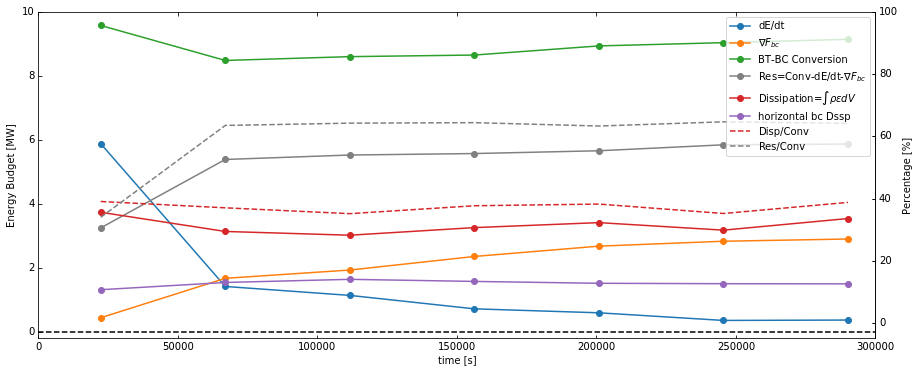

In [23]:
import mpl_toolkits.axisartist as AA
f=plt.figure(figsize=(15,6))
host=host_subplot(111,figure=f,axes_class=AA.Axes)
ax2=host.twinx()
par2=host.twinx()

offset = 0
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",axes=par2,offset=(offset, 0))
par2.axis["right"].toggle(all=True)

host.set_ylim(-0.2,10)
host.set_xlim(0,300000)

host.set_ylabel("Energy Budget [MW]")
host.set_xlabel("time [s]")
par2.set_ylabel("Percentage [%]") 

p1, = host.plot(DtdE.time_bins,DtdE,'o-',label="dE/dt")
host.plot(fxdy.time_bins,fxdy,'o-',label=r"$\nabla F_{bc}$")
host.plot(C.time_bins,C,'o-',label="BT-BC Conversion")
RL, = host.plot(R.time_bins,R,'o-',color='grey',label=r"Res=Conv-dE/dt-$\nabla F_{bc}$")
DL, = host.plot(D.time_bins,D,'o-',label=r"Dissipation=$\int \rho \varepsilon dV$")
host.plot(time1,np.zeros(ttlen),'k--')
host.plot(hDsspbc.time_bins,hDsspbc,'o-',label="horizontal bc Dssp")

p3, = par2.plot(RAT2.time_bins,RAT2,label="Res/Conv",linestyle="--",color=RL.get_color())
p2, = ax2.plot(RAT1.time_bins,RAT1,label="Disp/Conv",linestyle="--",color=DL.get_color())

ax2.set_ylim(-5,100)
par2.set_ylim(-5,100)

host.legend()
plt.savefig('./figs/EnergyBudget_hDssp_x27_t_tidal_p.png')
plt.show()

In [24]:
import texttable
table = texttable.Texttable()
table.set_cols_dtype(['t',  # text
                          'f',  # float (decimal)
                          'f','f','f','f','f','f'])
table.set_cols_align(["l", "r", "r", "r", "r", "r", "r", "r"])
table.add_rows([["Energy Budget", "period 1", "period 2", "period 3", "period 4", "period 5", "period 6", "period 7"],
               ["dE/dt",DtdE[0].values,DtdE[1].values,DtdE[2].values,DtdE[3].values,DtdE[4].values,DtdE[5].values,DtdE[6].values],
               [r"$\nabla F_{bc}$",fxdy[0].values,fxdy[1].values,fxdy[2].values,fxdy[3].values,fxdy[4].values,fxdy[5].values,fxdy[6].values],
               ["BT-BC conversion",C[0].values,C[1].values,C[2].values,C[3].values,C[4].values,C[5].values,C[6].values],
               ["Res",R[0].values,R[1].values,R[2].values,R[3].values,R[4].values,R[5].values,R[6].values],
               ["vDissipation",  D[0].values,D[1].values,D[2].values,D[3].values,D[4].values,D[5].values,D[6].values],
               ["hDissipation", hDsspbc[0].values,hDsspbc[1].values,hDsspbc[2].values,hDsspbc[3].values,hDsspbc[4].values,hDsspbc[5].values,hDsspbc[6].values]])
table.set_max_width(0)
print(table.draw())

/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/jxchang/jupyter_py3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invali

+------------------+----------+----------+----------+----------+----------+----------+----------+
|  Energy Budget   | period 1 | period 2 | period 3 | period 4 | period 5 | period 6 | period 7 |
+==================+==========+==========+==========+==========+==========+==========+==========+
| dE/dt            |    5.887 |    1.421 |    1.142 |    0.721 |    0.597 |    0.359 |    0.371 |
+------------------+----------+----------+----------+----------+----------+----------+----------+
| $\nabla F_{bc}$  |    0.443 |    1.676 |    1.935 |    2.359 |    2.682 |    2.835 |    2.905 |
+------------------+----------+----------+----------+----------+----------+----------+----------+
| BT-BC conversion |    9.583 |    8.489 |    8.608 |    8.658 |    8.944 |    9.045 |    9.150 |
+------------------+----------+----------+----------+----------+----------+----------+----------+
| Res              |    3.253 |    5.393 |    5.532 |    5.578 |    5.665 |    5.851 |    5.874 |
+------------------+

In [25]:
print(D.values)

[3.74131057 3.14138535 3.02377535 3.26171899 3.41741416 3.18205375
 3.54579838]
